In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
import os
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import datasets
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold  # 方差過濾
from sklearn.metrics import recall_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df= pd.read_csv("./All_clean_IQR.csv").drop(["Name","Sex","Country"],axis=1)
df

,Label,Eye_R_S_W,Eye_R_B_W,Eye_L_S_W,Eye_L_B_W,Eye_R_H1_W,Eye_R_H2_W,Eye_R_H3_W,Eye_R_H4_W,Eye_R_H5_W,...,face_R_widthS_L,face_L_width_L,face_L_widthS_L,Eye_to_eyebrow_L_L,eye_to_eyebrow_R_L,Nosehead_L,Forehead_w_L,nose_area,eye_R_area,eye_L_area
0,boss,0.186630,0.223305,0.182876,0.220148,0.013553,0.032178,0.047026,0.050299,0.041695,...,0.006584,0.507552,0.010848,0.069913,0.072954,0.103485,0.935589,0.149271,0.009237,0.009100
1,boss,0.200132,0.244124,0.177286,0.207472,0.015152,0.038025,0.056442,0.060386,0.050553,...,0.025190,0.288393,0.025477,0.057711,0.065030,0.086149,0.773583,0.145255,0.009582,0.008497
2,boss,0.179414,0.210726,0.192387,0.231409,0.019380,0.045778,0.066694,0.070605,0.057643,...,0.011141,0.487260,0.023674,0.050447,0.052480,0.076988,0.767872,0.161162,0.010328,0.009207
3,boss,0.175631,0.208198,0.179902,0.219480,0.024991,0.057128,0.082740,0.087278,0.069438,...,0.010561,0.333769,0.017909,0.046187,0.049003,0.051694,0.531466,0.190866,0.008599,0.009002
4,boss,0.189342,0.230542,0.180274,0.213068,0.008799,0.020458,0.030060,0.032070,0.027142,...,0.033373,0.543740,0.019484,0.056702,0.065572,0.122033,1.172724,0.120627,0.007554,0.007722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67303,sport,0.189668,0.224763,0.198537,0.235773,0.010172,0.024601,0.037045,0.040967,0.035552,...,0.004745,0.535850,0.008899,0.075036,0.080794,0.114940,0.938777,0.163385,0.007830,0.008369
67304,sport,0.194105,0.231643,0.176857,0.212704,0.012763,0.030614,0.045281,0.048855,0.041182,...,0.008964,0.513869,0.006003,0.060058,0.057974,0.107795,0.991027,0.138025,0.009976,0.007585
67305,sport,0.191906,0.226189,0.189833,0.226757,0.013453,0.031954,0.047510,0.051955,0.044398,...,0.011541,0.600640,0.016062,0.051738,0.071471,0.115522,1.017467,0.151713,0.010904,0.010422
67306,sport,0.201010,0.241555,0.181272,0.215937,0.010469,0.024807,0.036944,0.040215,0.034453,...,0.020875,0.473571,0.014753,0.058190,0.062242,0.116505,1.069344,0.124224,0.008928,0.006886


In [14]:
X=df.iloc[:,1:]
y=df["Label"]
y=y.to_list()
a=['boss', 'doctor', 'entertainer', 'ordinary_people', 'politician', 'sport']
for i in range(len(y)):
    if y[i] in a:
        b=y[i]
        y[i]=a.index(b)
y = pd.DataFrame(y)
y1=y.to_numpy()
y=y1.ravel()

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)

In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_val_scaler = pd.DataFrame(scaler.transform(X_val))
X_train_scaler=pd.DataFrame(X_train_scaler)
X_train_scaler

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,-0.438768,-0.521729,-0.795419,-0.489238,2.159966,2.122325,2.014126,1.884352,1.740111,0.416086,...,-0.654760,-0.714605,-0.510634,0.496659,0.109213,-1.269450,-1.238979,1.126758,0.879719,0.343468
1,-0.562963,-0.619093,0.076134,0.341534,1.287900,1.033742,0.974079,0.926249,0.830347,0.533288,...,-0.434319,0.113506,-0.226984,1.078496,-0.243872,-0.612027,-0.250931,0.359515,0.569127,0.655166
2,-0.439801,-0.520600,0.790996,0.709496,0.231622,0.245276,0.235936,0.230394,0.260468,0.999630,...,-0.157339,-0.289161,-0.131011,-0.200802,-0.295770,-0.686220,-0.383741,0.139857,-0.023885,0.133333
3,-1.907311,-1.998728,0.401001,0.818730,-0.786147,-0.760131,-0.730947,-0.676846,-0.620694,0.558358,...,0.084319,0.000543,0.778340,0.145501,-0.219759,-1.488901,-1.181677,1.536494,-1.252797,-0.421924
4,1.024859,1.195938,0.080399,-0.290690,1.150834,1.296235,1.317905,1.327291,1.373573,0.478621,...,0.579572,-1.258753,0.314356,0.834892,0.293094,-0.376930,-0.254619,-1.139584,1.322546,1.190030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,-0.007781,-0.196029,1.005409,0.879742,-0.395516,-0.221923,-0.172207,-0.156822,-0.125286,-1.428090,...,-0.426003,1.122106,-0.529130,-0.698768,0.585001,1.161502,0.617151,-0.378215,0.258680,0.394000
53842,0.749617,0.909155,-0.485815,-0.518313,-1.786111,-1.672006,-1.620811,-1.569779,-1.466045,0.796612,...,-0.449753,-0.880259,-0.478814,-1.751985,-1.957998,-0.023101,-0.434919,-0.098735,-1.529226,-1.950879
53843,0.327412,-0.109447,0.398015,0.509860,1.220768,1.081880,1.029309,0.979702,0.921228,0.787888,...,0.080391,0.154346,-0.110209,-0.520018,0.049007,-0.720356,-0.443113,0.585527,0.792091,0.881899
53844,-0.322843,-0.157443,0.211685,0.272158,0.691470,0.478572,0.329819,0.224081,0.111056,0.219537,...,-1.429438,-0.288162,-1.279826,0.936093,2.174612,-0.921108,-0.372568,-0.080494,-0.045155,0.574580


(53846, 32)


<AxesSubplot:>

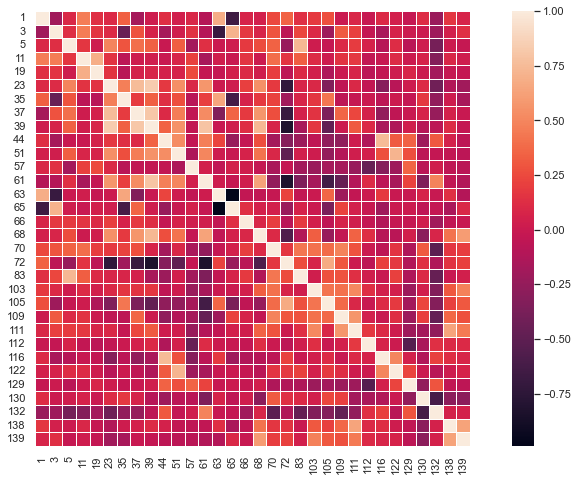

In [17]:
# corr
def find_correlation(df, thresh=0.9): # df: 量化變數資料矩陣


    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1) # 取下三角矩陣

    already_in = set() # 集合結構避免重複計入相同元素
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist() # Index物件轉為list
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr)) # 更新集合
            perfect_corr.append(col)
            result.append(perfect_corr)

    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat


drop_list = find_correlation(X_train_scaler, thresh=0.75)
X_train_corr = X_train_scaler.drop(drop_list, axis=1)
print(X_train_corr.shape)


X_corr2 =X_train_corr.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X_corr2, linewidths=0.5,square=True)

In [18]:
X_val_corr = X_val_scaler.drop(drop_list, axis=1)
X_val_corr

,1,3,5,11,19,23,35,37,39,44,...,109,111,112,116,122,129,130,132,138,139
0,0.116377,-1.399476,0.742325,-0.489104,0.943186,0.941624,1.374935,0.663165,0.397448,-0.254905,...,0.796977,-0.233150,-0.232696,-0.214187,0.351077,-0.775114,1.449438,-1.653223,-0.599346,-1.527918
1,0.201309,1.111476,0.589325,-0.009446,-0.264637,1.520743,0.527669,0.409686,0.321506,-0.351185,...,-0.180423,0.402448,-0.228533,-1.470978,-0.504690,0.551541,1.339035,-1.990870,-0.693890,-0.686925
2,0.263400,0.432277,-0.235304,0.764094,0.010983,0.511248,-0.080131,0.703619,0.750806,-0.076663,...,0.547058,0.911598,-1.603724,-0.766111,-1.348807,0.630551,0.919727,-0.708499,1.383175,0.434560
3,0.640152,-1.581888,-0.460457,0.070217,0.951445,-0.127785,0.745640,-0.025141,0.564348,-1.570643,...,0.366349,0.726370,0.989324,-1.369102,-0.993414,-1.426882,0.478850,0.184402,-0.169225,0.212297
4,-1.133958,1.417449,0.484272,0.187759,0.046432,0.990939,-0.039374,0.784664,0.473746,-0.556255,...,0.576353,0.805182,-0.665970,-0.363972,0.268239,-0.599441,-0.212861,-1.224968,0.710639,0.787301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457,-0.524159,0.687073,-0.212957,-0.165473,1.198449,1.075199,-0.228584,0.745050,0.102424,-1.143355,...,0.872798,0.758654,0.108665,-1.147826,-0.517337,-1.375608,1.497032,-2.435972,-0.509971,-0.650543
13458,0.440650,-0.418172,-0.752720,0.096188,-0.139456,-2.179594,-0.635124,-2.008573,-2.084986,-0.602596,...,0.597503,-0.100361,-1.003020,0.381606,1.167392,0.817343,0.013842,0.031787,0.929261,0.622914
13459,1.355001,0.528988,2.286303,1.269245,0.984539,1.177940,0.970099,1.094875,1.153124,-0.064142,...,1.844610,1.747438,0.106926,-0.595239,-0.018657,-0.003681,-0.475231,-1.697112,1.044385,0.064672
13460,1.995075,-1.489243,0.253793,0.296365,-0.964128,-1.663057,0.559013,-2.194424,-1.608508,-0.073174,...,-0.697785,-0.335921,1.236239,1.086158,0.735948,-0.592585,-1.136775,1.243054,0.656422,0.507227


In [19]:
model = RandomForestClassifier(n_estimators=20, max_depth=9,class_weight="balanced",n_jobs=-1)

In [20]:
scores = cross_val_score(model, X_train_corr, y_train, cv=5, scoring='recall_macro')
print(scores)

print("Accuracy: {} (+/- {})".format(scores.mean(), scores.std() * 2))

[0.75295062 0.74605768 0.73012392 0.75996283 0.75151874]
Accuracy: 0.7481227584227711 (+/- 0.020064913094812068)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train_corr, y_train, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
recall_w = recall_score(y_test, y_pred,average="macro")
recall_N = recall_score(y_test, y_pred,average=None)


# print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))
print(f"recall:{recall_w}")
print(f"recall:{recall_N}")

accuracy: 0.9537604456824512
con_matrix: 
[[ 354   51   65   83   62   13]
 [   0  107    9    2   38    3]
 [   5   44  773    3   32    5]
 [   0    4    0 8839    0    3]
 [   0   42    6    0  116    2]
 [   0    8    8    6    4   83]]
recall:0.7654789558365284
recall:[0.56369427 0.67295597 0.89675174 0.99920868 0.69879518 0.76146789]


In [25]:
y_pred1 = model.predict(X_val_corr)
accuracy = accuracy_score(y_val, y_pred1)
con_matrix = confusion_matrix(y_val, y_pred1)
recall_w = recall_score(y_val, y_pred1,average="macro")
recall_N = recall_score(y_val, y_pred1,average=None)
print('accuracy: {}'.format(accuracy))
print('con_matrix:\n {}'.format(con_matrix))
print(f"recall:{recall_w}")
print(f"recall:{recall_N}")

accuracy: 0.9513445253305601
con_matrix:
 [[  469    68    67   104    87    16]
 [    1   110    10     5    59     5]
 [    7    55   957     3    36    10]
 [    2    11     0 11008     0     1]
 [    1    50    10     0   150     5]
 [    0    21     8     5     8   113]]
recall:0.7459199494670186
recall:[0.5782984  0.57894737 0.89606742 0.99872981 0.69444444 0.72903226]


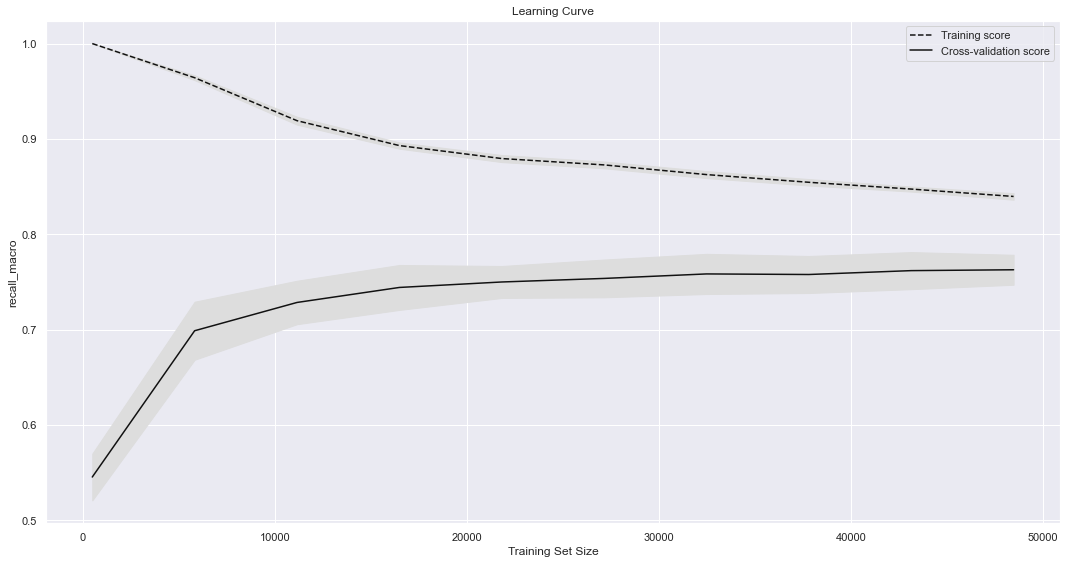

In [21]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=100, max_depth=9,class_weight="balanced"), 
                                                        X_train_corr, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='recall_macro',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("recall_macro"), plt.legend(loc="best")
plt.tight_layout()
plt.show()